In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
dt = pd. read_csv("E:/python/Python for M L/cricket_analysis/icc_wc_23_bat.csv")
dt

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate
0,Rohit Sharma,b,4,2,2,1,0,200.00
1,Shubman Gill,c,92,92,136,11,2,100.00
2,Virat Kohli,c,88,94,139,11,0,93.61
3,Shreyas Iyer,c,82,56,84,3,6,146.42
4,KL Rahul,c,21,19,34,2,0,110.52
...,...,...,...,...,...,...,...,...
870,Iftikhar Ahmed,c,3,5,8,0,0,60.00
871,Shadab Khan,b,4,7,4,1,0,57.14
872,Shaheen Shah Afridi,lbw,25,23,23,3,1,108.69
873,Mohammad Wasim,not,16,14,33,2,1,114.28


In [3]:
data = pd.DataFrame(dt)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player       875 non-null    object 
 1   dismissal    875 non-null    object 
 2   runs         875 non-null    int64  
 3   balls        875 non-null    int64  
 4   minutes      875 non-null    int64  
 5   4s           875 non-null    int64  
 6   6s           875 non-null    int64  
 7   strike_rate  875 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 54.8+ KB


In [5]:
data.shape

(875, 8)

In [6]:
data.describe()

,runs,balls,minutes,4s,6s,strike_rate
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,26.773714,29.090286,42.259429,2.558857,0.736000,82.771337
std,31.018840,28.579166,41.752733,3.148084,1.490633,53.106854
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,8.000000,12.000000,0.000000,0.000000,50.000000
50%,15.000000,19.000000,27.000000,1.000000,0.000000,80.430000
75%,39.000000,40.500000,59.000000,4.000000,1.000000,106.660000
max,201.000000,143.000000,217.000000,21.000000,11.000000,600.000000


In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

player         0
dismissal      0
runs           0
balls          0
minutes        0
4s             0
6s             0
strike_rate    0
dtype: int64

## Data visualization

In [11]:
top_scores=data[['player','runs']]
top_scores=top_scores.sort_values(by='runs', ascending=False).head(10)
top_scores

,player,runs
700,Glenn Maxwell,201
656,Mitchell Marsh,177
52,Quinton de Kock,174
365,David Warner,163
621,Devon Conway,152
238,Dawid Malan,140
496,Travis Head,137
550,Daryl Mitchell,134
299,Rassie van der Dussen,133
838,Rohit Sharma,131


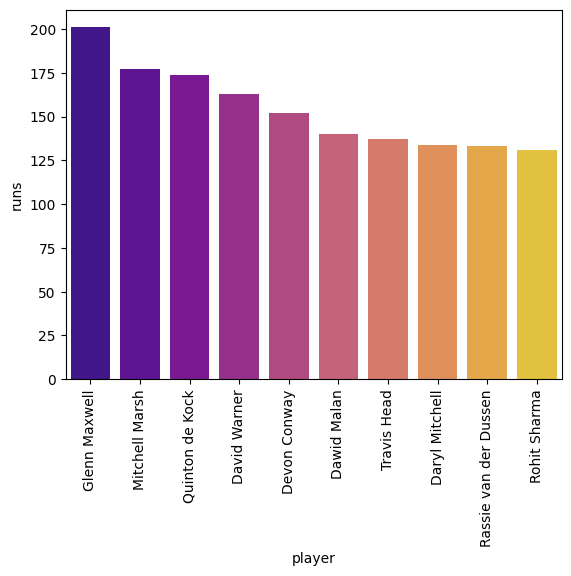

In [12]:
sns.barplot(x='player', y='runs', data=top_scores,palette='plasma')
plt.xticks(rotation=90)
plt.show()

In [13]:
series_top_runs = data.groupby('player')['runs'].sum().reset_index()
series_top_runs = series_top_runs.sort_values(by='runs', ascending=False).head(10)
series_top_runs

,player,runs
143,Virat Kohli,765
113,Rohit Sharma,597
103,Quinton de Kock,594
104,Rachin Ravindra,578
18,Daryl Mitchell,552
21,David Warner,535
125,Shreyas Iyer,530
56,KL Rahul,452
108,Rassie van der Dussen,448
82,Mitchell Marsh,441


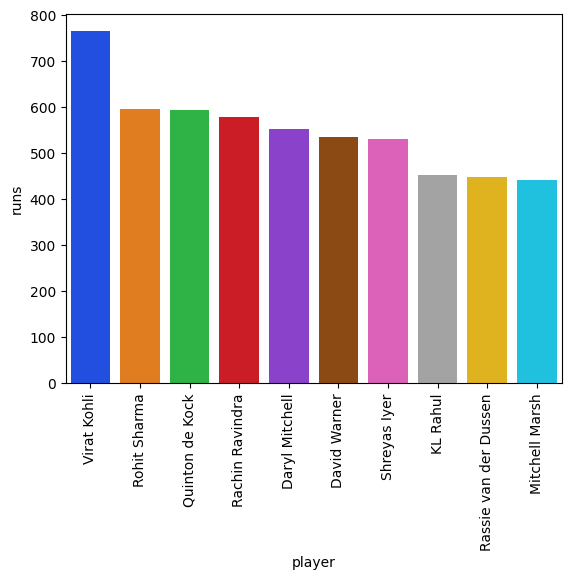

In [14]:
sns.barplot(x='player', y='runs', data=series_top_runs,palette='bright')
plt.xticks(rotation=90)
plt.show()

In [15]:
series_strike_rate = data.groupby('player')['strike_rate'].mean().reset_index()
series_strike_rate = series_strike_rate.sort_values(by='strike_rate', ascending=False).head(10)
series_strike_rate

,player,strike_rate
22,David Willey,163.933333
4,Aiden Markram,151.525000
37,Hardik Pandya,137.500000
110,Reece Topley,132.140000
113,Rohit Sharma,127.897273
20,David Miller,123.346000
43,Heinrich Klaasen,123.195000
36,Gus Atkinson,122.220000
74,Marcus Stoinis,121.516000
21,David Warner,119.574545


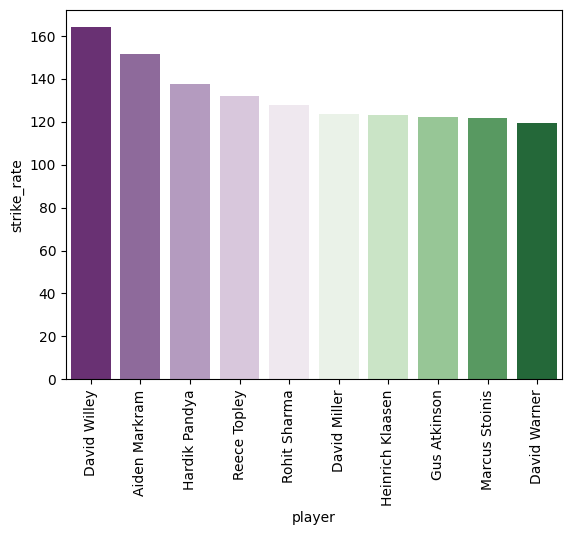

In [16]:
sns.barplot(x='player', y='strike_rate', data=series_strike_rate,palette='PRGn')
plt.xticks(rotation=90)
plt.show()

In [17]:
most_outs = data.groupby('player')['dismissal'].count().sort_values(ascending=False).head(10).reset_index()
print(most_outs)

             player  dismissal
0      Rohit Sharma         11
1       Virat Kohli         11
2      Shreyas Iyer         11
3      David Warner         11
4  Heinrich Klaasen         10
5    Mitchell Marsh         10
6      David Miller         10
7   Rachin Ravindra         10
8      Steven Smith         10
9   Quinton de Kock         10


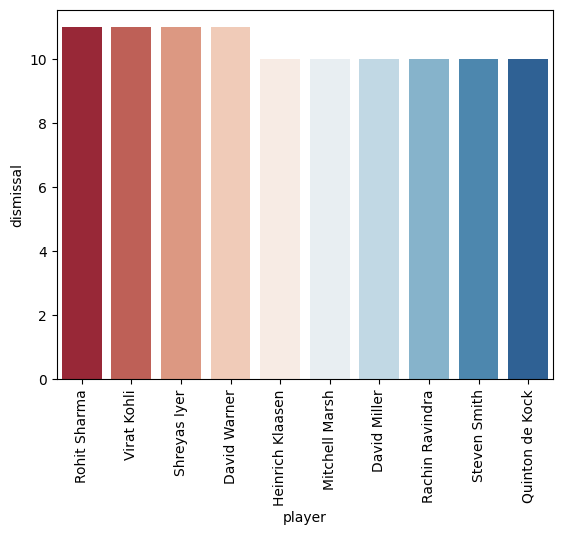

In [18]:
sns.barplot(x='player', y='dismissal', data=most_outs,palette='RdBu')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='strike_rate', ylabel='runs'>

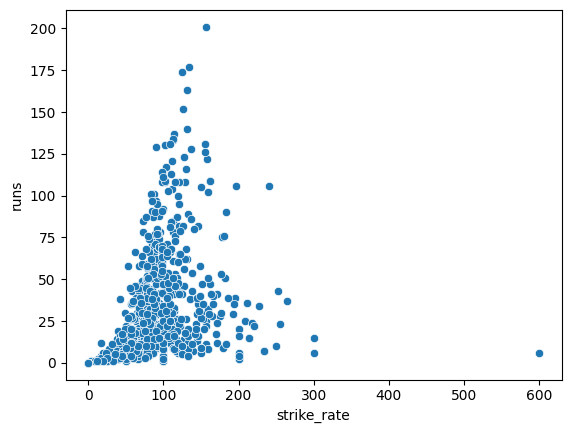

In [19]:
sns.scatterplot(x='strike_rate', y='runs', data=data)

<Axes: xlabel='strike_rate', ylabel='balls'>

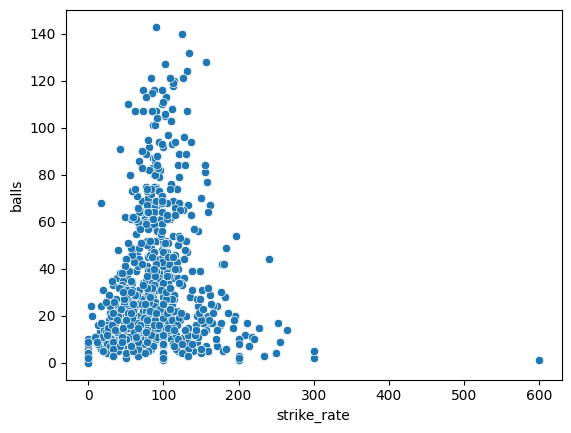

In [20]:
sns.scatterplot(x='strike_rate', y='balls', data=data)

<Axes: xlabel='balls', ylabel='runs'>

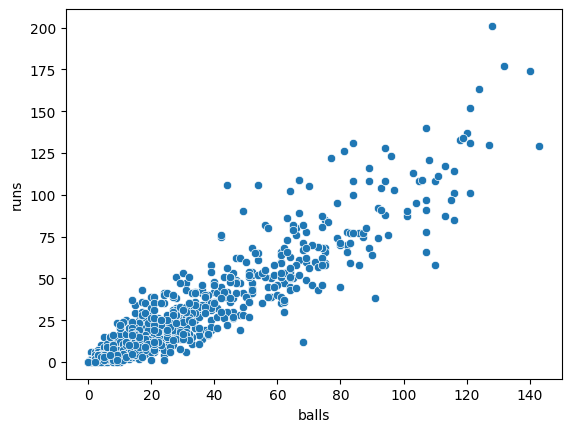

In [21]:
sns.scatterplot(x='balls', y='runs', data=data)

<Axes: xlabel='runs', ylabel='Density'>

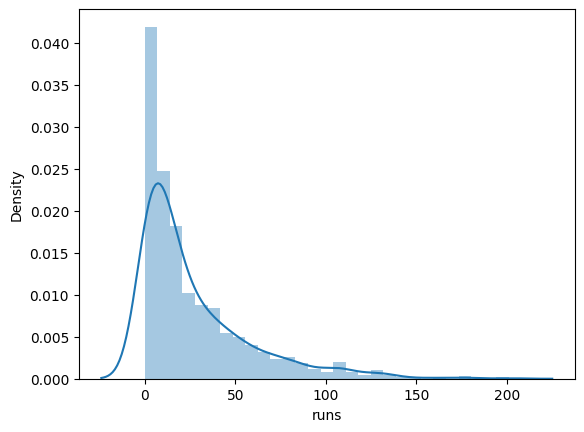

In [22]:
sns.distplot(data['runs'])

(array([276., 439., 119.,  32.,   5.,   2.,   0.,   0.,   0.,   1.]),
 array([  0.,  60., 120., 180., 240., 300., 360., 420., 480., 540., 600.]),
 <BarContainer object of 10 artists>)

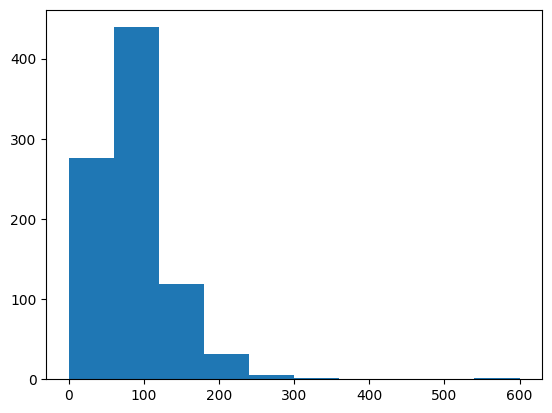

In [23]:
plt.hist(data['strike_rate'])

<Axes: xlabel='balls', ylabel='Density'>

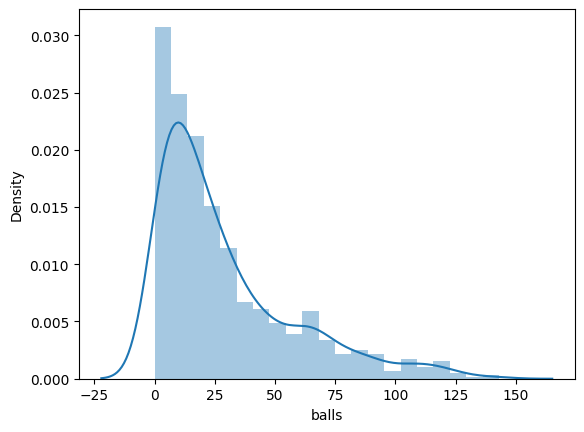

In [24]:
sns.distplot(data["balls"])

## Encoding and Feature Scaling

In [25]:
data= data.replace({"retired": 0, "timed": 1, "st": 2,"run": 3, "lbw": 4, "b": 5, "not": 6, "c": 7})

In [26]:
new_data =data[['runs','balls','minutes','strike_rate']]
new_data

,runs,balls,minutes,strike_rate
0,4,2,2,200.00
1,92,92,136,100.00
2,88,94,139,93.61
3,82,56,84,146.42
4,21,19,34,110.52
...,...,...,...,...
870,3,5,8,60.00
871,4,7,4,57.14
872,25,23,23,108.69
873,16,14,33,114.28


In [27]:
from sklearn.preprocessing import MinMaxScaler
# Creating an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler to the data and transforming the data
new_data= scaler.fit_transform(new_data)

# Printing the scaled data
print(new_data)

[[0.0199005  0.01398601 0.00462963 0.33333333]
 [0.45771144 0.64335664 0.625      0.16666667]
 [0.43781095 0.65734266 0.63888889 0.15601667]
 ...
 [0.12437811 0.16083916 0.10185185 0.18115   ]
 [0.07960199 0.0979021  0.14814815 0.19046667]
 [0.17412935 0.16083916 0.12037037 0.25361667]]


In [28]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)

In [29]:
numeric_cols = ['dismissal', 'runs','balls','minutes','4s','6s','strike_rate']
numeric_data = data[numeric_cols]

In [30]:
from sklearn.decomposition import PCA
# Selecting the numerical columns for PCA
numeric_data

# Applying PCA
pca = PCA(n_components=1)  # Choosing 1 component for simplicity
principal_components = pca.fit_transform(numeric_data)

# Creating a new DataFrame with player names and their principal component scores
player_ranking = pd.DataFrame({
    'Player': data['player'],
    'PC1_Score': principal_components.flatten()
})

# Ranking the players based on their PC1 scores
player_ranking = player_ranking.sort_values(by='PC1_Score', ascending=False).reset_index(drop=True)
print(player_ranking)

                   Player   PC1_Score
0           Aiden Markram  249.888031
1           Glenn Maxwell  238.811335
2         Quinton de Kock  218.494067
3          Mitchell Marsh  213.963522
4            David Warner  204.607931
..                    ...         ...
869  Roelof van der Merwe  -93.584419
870         Scott Edwards  -93.587280
871        Shoriful Islam  -93.962822
872             Mark Wood  -93.962822
873        Josh Hazlewood  -93.962822

[874 rows x 2 columns]


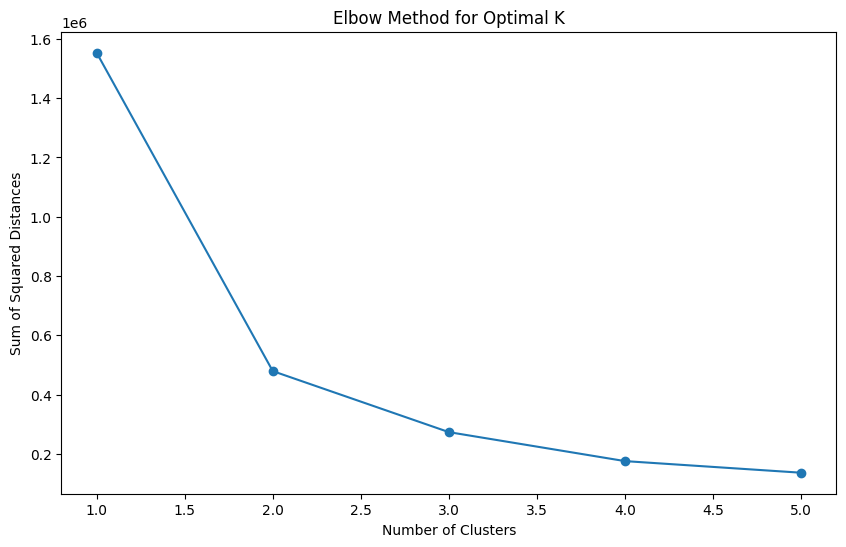

In [31]:
from sklearn.cluster import KMeans
# Initialize an empty list to store the sum of squared distances
ssd = []

# Define the range of clusters to test
K = range(1,6)

# Apply KMeans for each value of K and calculate the sum of squared distances
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(numeric_data[['runs','balls']])
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

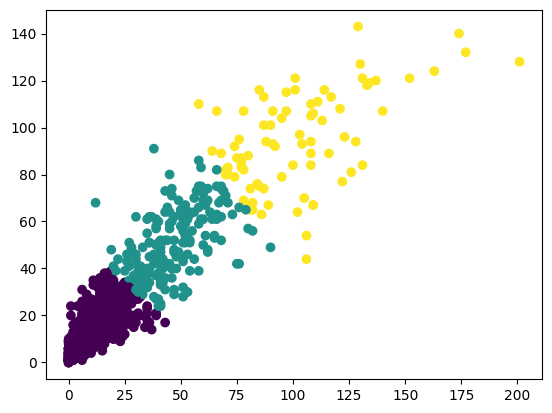

In [32]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
k_means.fit(numeric_data[['runs','balls']])
numeric_data['k_means'] = k_means.labels_
numeric_data
plt.scatter(x = 'runs' , y = 'balls', data= numeric_data, c = k_means.labels_)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## Seperate independent and dependent features
X = numeric_data.iloc[:,1::]
Y = numeric_data['dismissal']

## Splitting data into train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=45)

## performing entropy measure
clf_enpy = DecisionTreeClassifier(criterion = 'entropy',random_state=45,max_depth=2,min_samples_leaf=4)
clf_enpy.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4,
                       random_state=45)

In [34]:
## predicting test data
y_pred = clf_enpy.predict(X_test)
print(y_pred)

[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7]


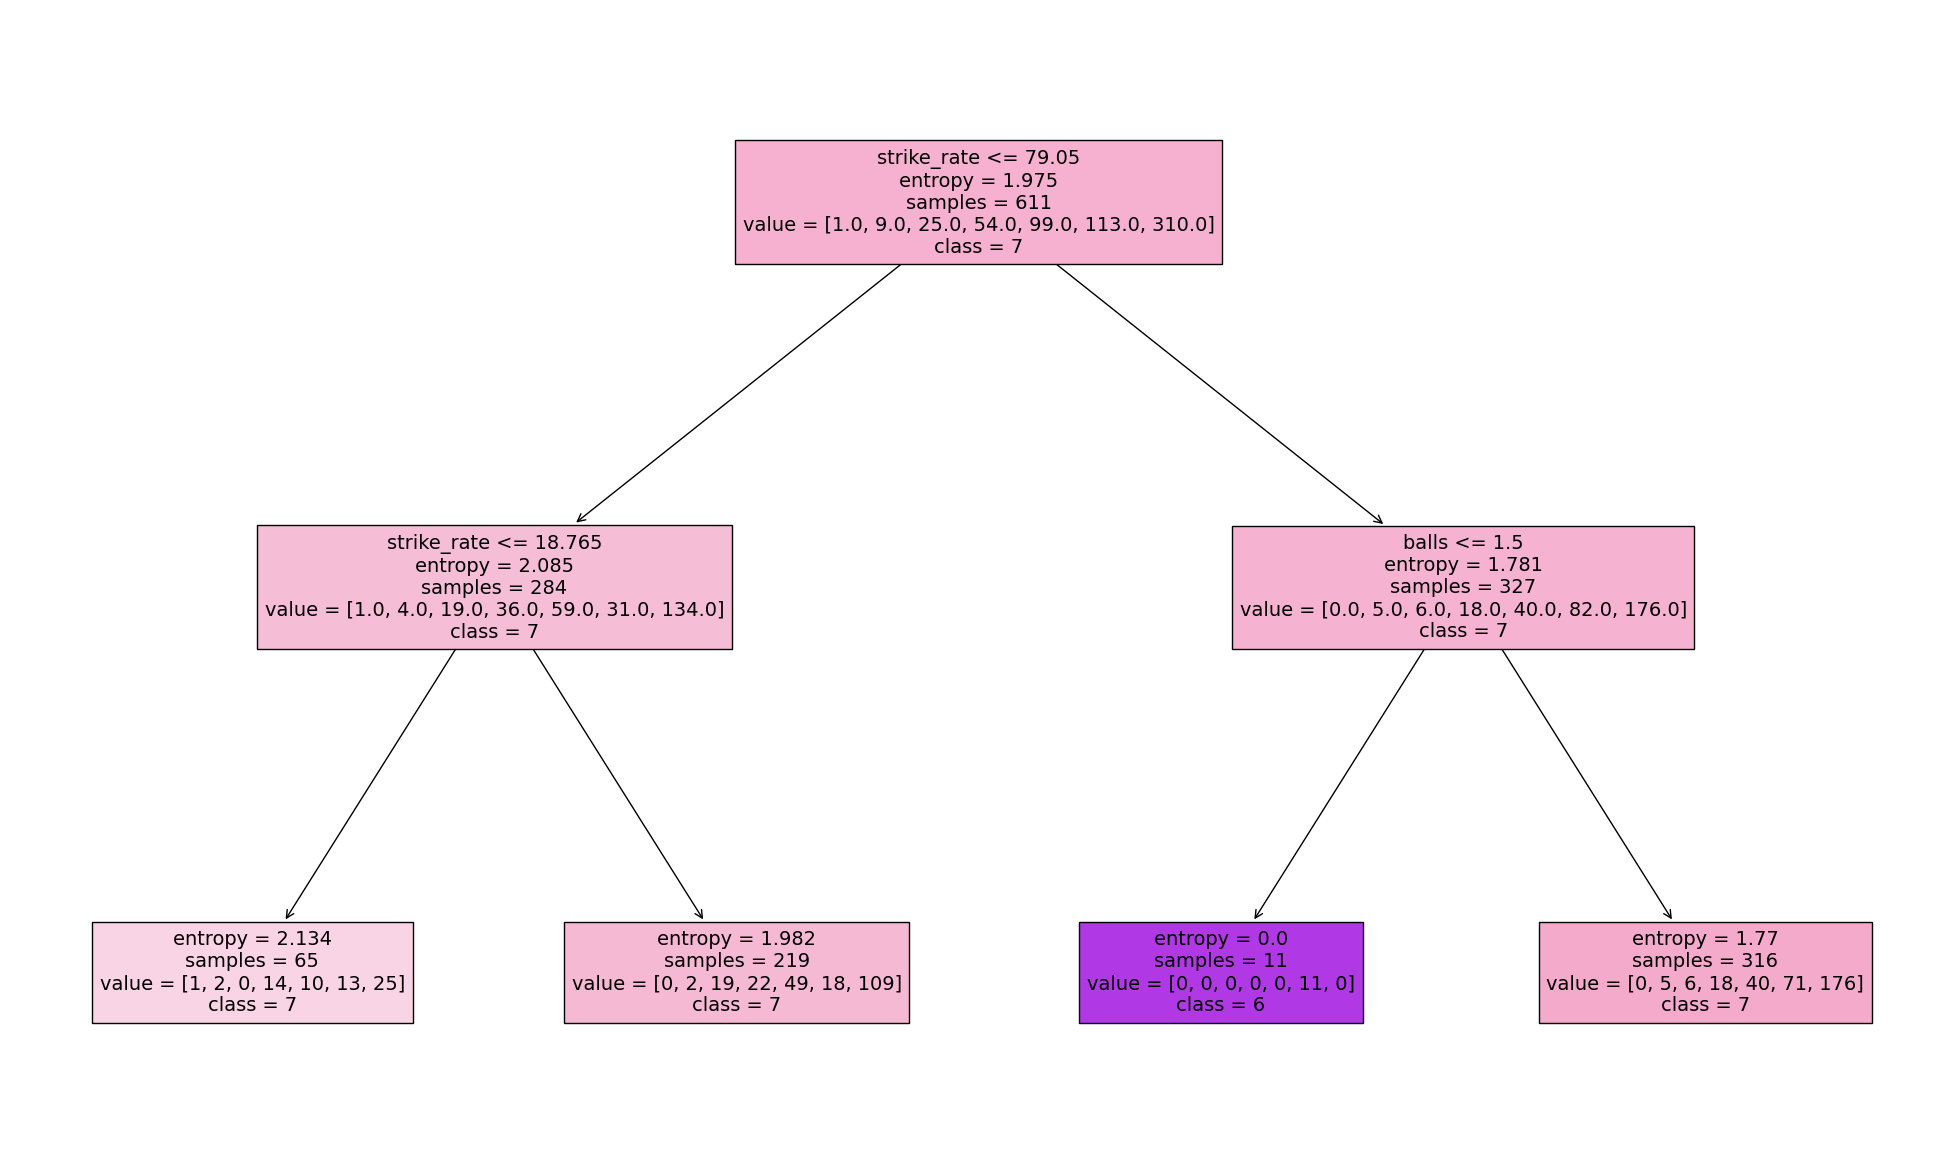

In [35]:
from sklearn.tree import plot_tree
class_names = [str(label) for label in set(Y_train)]
plt.figure(figsize=(25, 15))
plot_tree(clf_enpy, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [36]:
## Checking Accuracy
acc = accuracy_score(Y_test,y_pred)
print('Accuracy:',acc)

Accuracy: 0.5817490494296578


In [37]:
from sklearn.metrics import confusion_matrix  # For classification
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   2]
 [  0   0   0   0   0   0  13]
 [  0   0   0   0   0   0  22]
 [  0   0   0   0   0   0  42]
 [  0   0   0   0   0   2  30]
 [  0   0   0   0   0   0 151]]


In [38]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test,y_pred,average = 'micro')
f1

0.5817490494296578